<a href="https://colab.research.google.com/github/pradnyabala/assignment/blob/main/CS1200_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips_feature = tips[['total_bill']]
tips_target = tips[['tip']]

In [ ]:
tips_feature_train, tips_feature_test, tips_target_train, tips_target_test = train_test_split(tips_feature, tips_target)

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(tips_feature_train, tips_target_train)

LinearRegression()

In [ ]:
tips_target_pred = regr.predict(tips_feature_test)

In [ ]:
print(f'Mean Squared Error {mean_squared_error(tips_target_test, tips_target_pred):.2f}')

Mean Squared Error 0.82


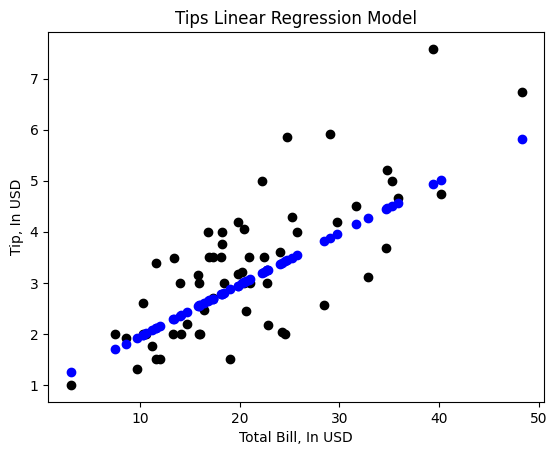

In [ ]:
plt.scatter(tips_feature_test, tips_target_test, color="black")
plt.scatter(tips_feature_test, tips_target_pred, color="blue")
plt.title('Tips Linear Regression Model')
plt.xlabel('Total Bill, In USD')
plt.ylabel('Tip, In USD')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = sns.load_dataset('iris')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_features = iris[['sepal_length', 'sepal_width']]
iris_target = iris[['species']]

In [ ]:
iris_feature_train, iris_feature_test, iris_target_train, iris_target_test = train_test_split(iris_features, iris_target, test_size=.33)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(iris_feature_train, iris_target_train)
iris_target_predictions = knn.predict(iris_feature_test)
accuracy = accuracy_score(iris_target_test, iris_target_predictions)
print(f'The accuracy of our model is {accuracy:.2f}')
knn = KNeighborsClassifier(n_neighbors=3)


The accuracy of our model is 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
## Create Value Map
value_dict = {True: 'Correct', False: 'Incorrect'}

## Check Data Types
print(type(iris_target_test))
print(type(iris_target_predictions))

## Clean Data
iris_target_test = iris_target_test['species']
iris_target_predictions = pd.Series(iris_target_predictions)
iris_target_test = iris_target_test.reset_index()['species']
iris_target_predictions.name = 'species'

### Validate Data Types
print(type(iris_target_test))
print(type(iris_target_predictions))

#### Create a dataframe with all of the information we will need for our two vizualizations
viz_frame = iris_feature_test.reset_index()[['sepal_length', 'sepal_width']]
viz_frame['outcome'] = (iris_target_test == iris_target_predictions).map(value_dict)
viz_frame['species'] = iris_target_test

##### Validate viz_frame
viz_frame.head(3)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,sepal_length,sepal_width,outcome,species
0,5.1,3.7,Correct,setosa
1,6.0,3.0,Incorrect,virginica
2,4.3,3.0,Correct,setosa


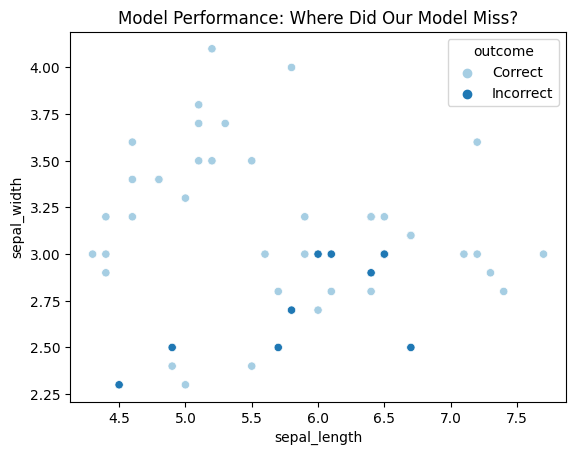

In [ ]:
sns.set_palette(sns.color_palette("Paired"))
accuracy_plot = sns.scatterplot(viz_frame, x='sepal_length', y='sepal_width', hue='outcome')
accuracy_plot.set(title = 'Model Performance: Where Did Our Model Miss?')
plt.show()

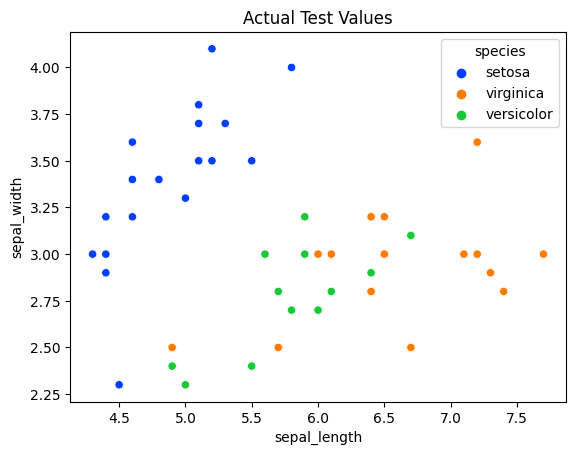

In [ ]:
sns.set_palette(sns.color_palette('bright'))
viz_frame['species'] = pd.Series(iris_target_test)
sns.scatterplot(viz_frame, x='sepal_length', y='sepal_width', hue='species').set(title = 'Actual Test Values')
plt.show()
